<a href="https://colab.research.google.com/github/xl4tir/Pattern-recognition/blob/main/%D0%BB%D0%B0%D0%B1%D0%B04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Розпізнавання об'єктів на зображеннях з набору даних CIFAR-10


Для того щоб редагувати код, збережіть копію цього ноутбука собі (File->Save a copy in Drive...). Свою копію ви зможете змінювати та запускати.


In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Розмір міні-вибірки
batch_size = 128
# Кількість класів зображень
nb_classes = 10
# Кількість епох для навчання
nb_epoch = 25
# Розмір зображеннь
img_rows, img_cols = 32, 32
# Кількість каналів в зображенні 
img_channels = 3
# Назви класівз набору даних  CIFAR-10
classes=['літак', 'автомобіль', 'птиця', 'кіт', 'олень', 'собака', 'жаба', 'кінь', 'корабель', 'вантажівка']

## Підготовка даних

**Завантажуємо дані**

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


**Перагляд прикладів даних**

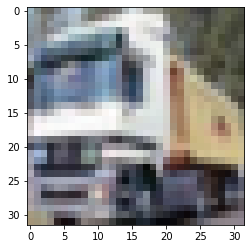

Номер класу: [9]
Тип об'єкту: вантажівка


In [4]:
n = 1
plt.imshow(X_train[n])
plt.show()
print("Номер класу:", y_train[n])
print("Тип об'єкту:", classes[y_train[n][0]])

**Нормалізуємо  дані**

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Перетворюємо вірні відповіді в формат one hot encoding**

In [6]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Створюємо нейронну мережу

In [21]:
# Створюємо послідовну модель
model = Sequential()
# Перший згортковий шар
model.add(Conv2D(128, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))

# Другий згортковий шар
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# Перший шар підвибірки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Шар регуляризації Dropout
model.add(Dropout(0.25))

# Третій згортковий шар
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# Четвертий згортковий шар
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# Другий шар підвибірки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Шар регуляризації Dropout
model.add(Dropout(0.55))
# Шар перетворення даних з 2D представлення в пласке
model.add(Flatten())
# Повнозв'язаний шар для класифікації
model.add(Dense(612, activation='relu'))
# Шар регуляризації Dropout
model.add(Dropout(0.5))
# Вихідний Повнозв'язаний шар
model.add(Dense(nb_classes, activation='softmax'))

**Друкуємо інформацію щодо мережі**

In [22]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 128)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 128)       147584    
                                                      

**Компілюємо модель**

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Навчаємо нейрону мережу

In [24]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=100,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Epoch 1/100
352/352 - 17s - loss: 1.7855 - accuracy: 0.3284 - val_loss: 1.4481 - val_accuracy: 0.4856 - 17s/epoch - 48ms/step
Epoch 2/100
352/352 - 14s - loss: 1.3436 - accuracy: 0.5102 - val_loss: 1.1471 - val_accuracy: 0.5996 - 14s/epoch - 39ms/step
Epoch 3/100
352/352 - 14s - loss: 1.1635 - accuracy: 0.5778 - val_loss: 0.9943 - val_accuracy: 0.6692 - 14s/epoch - 40ms/step
Epoch 4/100
352/352 - 14s - loss: 1.0298 - accuracy: 0.6333 - val_loss: 0.9174 - val_accuracy: 0.6754 - 14s/epoch - 40ms/step
Epoch 5/100
352/352 - 14s - loss: 0.9263 - accuracy: 0.6726 - val_loss: 0.7825 - val_accuracy: 0.7384 - 14s/epoch - 41ms/step
Epoch 6/100
352/352 - 14s - loss: 0.8607 - accuracy: 0.6976 - val_loss: 0.7336 - val_accuracy: 0.7482 - 14s/epoch - 41ms/step
Epoch 7/100
352/352 - 14s - loss: 0.8041 - accuracy: 0.7162 - val_loss: 0.7166 - val_accuracy: 0.7586 - 14s/epoch - 41ms/step
Epoch 8/100
352/352 - 14s - loss: 0.7557 - accuracy: 0.7371 - val_loss: 0.6942 - val_accuracy: 0.7632 - 14s/epoch - 41

## Оцінюємо якість  навчання мережі

In [26]:
# Оцінюємо якість навчання моделі на тестових даних 
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точність роботи на тестових даних: %.2f%%" % (scores[1]*100))

Точність роботи на тестових даних: 83.10%


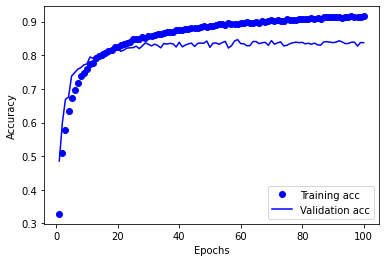

In [27]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Зберігаємо навчену нейрону мережу

In [28]:
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model1.h5")

In [29]:
!ls

cifar10_model1.h5  cifar10_model.json  sample_data


In [30]:
from google.colab import files

In [31]:
files.download("cifar10_model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
files.download("cifar10_model1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Застосовуємо мережу для розпізнавання об'єктів на зображеннях 

**Перегляд зображення з набору даних для тестування**

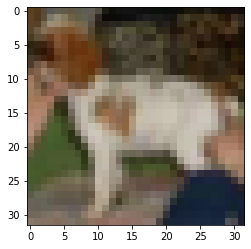

In [39]:
index=12
plt.imshow(X_test[index])
plt.show()

**Перетворення тестового зображення**

In [40]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

**Запуск распізнавання**

In [41]:
prediction = model.predict(x)

**Друкуємо результати розпізнавання**

In [42]:
print(prediction)

[[3.1098449e-07 1.1947407e-08 1.6206615e-03 3.6437181e-01 6.5356642e-02
  5.6498796e-01 6.7219598e-04 2.9903667e-03 3.3047360e-08 5.5836534e-08]]


**Перетворюємо результати з формату one hot encoding**

In [43]:
prediction = np.argmax(prediction)
print(classes[prediction])

собака


**Друкуємо вірну відповідь**

In [44]:
print(classes[y_test[index][0]])

собака


## Розпізнаємо додаткове зображення

In [45]:
files.upload()

Saving в1.jpeg to в1.jpeg
Saving ж1.jpg to ж1.jpg
Saving к1.jpg to к1.jpg
Saving к2.jpg to к2.jpg
Saving к11.jpg to к11.jpg
Saving к112.jpg to к112.jpg
Saving ка1.jpg to ка1.jpg
Saving л1.jpg to л1.jpg
Saving о1.jpg to о1.jpg
Saving о2.jpg to о2.jpg
Saving п1.jpg to п1.jpg
Saving п2.jpg to п2.jpg
Saving с1.jpg to с1.jpg
Saving с2.jpg to с2.jpg


{'в1.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x04$\x04$\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\xff\xc4\x00\x1b\x01\x01\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xfa\xa0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

Перевіряємо завантаження файлів

In [46]:
!ls

cifar10_model1.h5   в1.jpeg   к11.jpg  ка1.jpg	о2.jpg	с1.jpg
cifar10_model.json  ж1.jpg    к1.jpg   л1.jpg	п1.jpg	с2.jpg
sample_data	    к112.jpg  к2.jpg   о1.jpg	п2.jpg


**Дивимось завантажений малюнок**

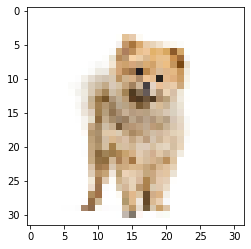

In [81]:
img_path = 'с1.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

**Перетворюємо малюнок в масив для розпізнавання**

In [82]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

**Запускаємо розпізнавання**

In [83]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

собака
